In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import seaborn as sns

import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv
from panel.interact import interact
from datetime import datetime
from pandas import DataFrame

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Pranav\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\Pranav\anaconda3\envs\pyvizenv\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
# Reading MApboc API to variable
load_dotenv(find_dotenv())
map_box_api = os.getenv("MAPBOXAPI")

In [3]:
# Setting Mapbox key
px.set_mapbox_access_token(map_box_api)

In [46]:
# Checking for API key
type(map_box_api)

str

### British Columbia Wild fire info was obtained from the following URL : 
http://bcfireinfo.for.gov.bc.ca/hprScripts/WildfireNews/Fires.asp?LatLong=On&Mode=normal&AllFires=0&FC=0

In [5]:
# Read csv historical data for Corn (ZC)
csvpath_fire=("BC_wildfire-new.csv")
fire_df = pd.read_csv(csvpath_fire, parse_dates=True, index_col="Discovery Date", infer_datetime_format=True)

#Display sample data
fire_df.head()

Fire No.              Geographic Hectares    Latitude  \
Discovery Date                                                         
2021-06-20       V10859       Eleven Mile Creek       42  49° 19.438   
2021-07-03       V11341                Skowkona      1.9  53° 18.925   
2021-07-04       V31386  Pemberton Portage Road     0.23  50° 31.377   
2021-07-05       V31497              Wade Creek      0.1  50° 33.117   
2021-06-27       V50948           Daniels River      2.5  50° 16.057   

                  Longitude  Latitude.1  Longitude.1  
Discovery Date                                        
2021-06-20      121° 16.983       50.53      -124.00  
2021-07-03      132° 07.264       55.87      -132.85  
2021-07-04      122° 29.797       51.56      -124.70  
2021-07-05      122° 25.728       50.88      -124.44  
2021-06-27      124° 23.893       50.43      -126.86

In [6]:
# Checking for nulls
fire_df.isnull().sum()

Fire No.       0
Geographic     0
Hectares       0
Latitude       0
Longitude      0
Latitude.1     0
Longitude.1    0
dtype: int64

In [7]:
# Dropping NA's
fire_df.dropna(inplace=True)

In [8]:
# Reading sample data
fire_df.head()

Fire No.              Geographic Hectares    Latitude  \
Discovery Date                                                         
2021-06-20       V10859       Eleven Mile Creek       42  49° 19.438   
2021-07-03       V11341                Skowkona      1.9  53° 18.925   
2021-07-04       V31386  Pemberton Portage Road     0.23  50° 31.377   
2021-07-05       V31497              Wade Creek      0.1  50° 33.117   
2021-06-27       V50948           Daniels River      2.5  50° 16.057   

                  Longitude  Latitude.1  Longitude.1  
Discovery Date                                        
2021-06-20      121° 16.983       50.53      -124.00  
2021-07-03      132° 07.264       55.87      -132.85  
2021-07-04      122° 29.797       51.56      -124.70  
2021-07-05      122° 25.728       50.88      -124.44  
2021-06-27      124° 23.893       50.43      -126.86

In [9]:
# Checking for null's
fire_df.isnull().sum()

Fire No.       0
Geographic     0
Hectares       0
Latitude       0
Longitude      0
Latitude.1     0
Longitude.1    0
dtype: int64

In [10]:
# Display dataframe information
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2021-06-20 to 2021-07-04
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fire No.     150 non-null    object 
 1   Geographic   150 non-null    object 
 2   Hectares     150 non-null    object 
 3   Latitude     150 non-null    object 
 4   Longitude    150 non-null    object 
 5   Latitude.1   150 non-null    float64
 6   Longitude.1  150 non-null    float64
dtypes: float64(2), object(5)
memory usage: 9.4+ KB


In [11]:
# Displaying sample data
fire_df.sort_values(by='Geographic').tail(15)

Fire No.                Geographic Hectares    Latitude  \
Discovery Date                                                           
2021-07-02       K41283                Trap Creek     15.2  50° 07.710   
2021-07-04       K41384              Tsuius Creek      1.1  50° 36.200   
2021-07-02       G71324             Twidell Creek      0.5  55° 01.061   
2021-07-02       N51317          Van Houten Creek     0.02  49° 40.005   
2021-06-29       K51032           W of Darke Lake      0.3  49° 42.893   
2021-07-02       K21239  W of Droppingwater Creek      0.5  50° 26.915   
2021-07-01       C41191         W of Succour Lake      350  51° 54.344   
2021-07-05       V31497                Wade Creek      0.1  50° 33.117   
2021-07-05       K71497                Wade Creek      0.1  50° 33.728   
2021-06-30       K51072     West of Darke Lake #2      0.1  49° 43.070   
2021-06-30       G71134      West of Murray River      180  54° 46.349   
2021-06-29       G91024                   Wildboy        2  59° 43.871   
2021-07-05       C41475         Willowswamp Creek      0.3  51° 58.887   
2021-07-04       K51423             Wolfcub Creek       45  49° 11.040   
2021-07-04       N71379            Woodbury Creek     0.26  49° 49.021   

                  Longitude  Latitude.1  Longitude.1  
Discovery Date                                        
2021-07-02      118° 25.280       52.09      -119.19  
2021-07-04      118° 34.330       51.16      -119.48  
2021-07-02      121° 51.400       55.19      -122.96  
2021-07-02      118° 06.742       49.68      -120.16  
2021-06-29      119° 52.262       52.18      -120.59  
2021-07-02      120° 21.767       52.98      -122.48  
2021-07-01      120° 50.487       52.86      -122.19  
2021-07-05      122° 25.728       50.88      -124.44  
2021-07-05      122° 26.822       52.57      -124.72  
2021-06-30      119° 52.110       49.91      -120.17  
2021-06-30      121° 14.469       55.74      -122.54  
2021-06-29      121° 11.177       62.14      -121.68  
2021-07-05      120° 49.390       54.43      -121.90  
2021-07-04      119° 30.868       49.29      -121.91  
2021-07-04      116° 55.495       49.88      -118.29

In [13]:
# Displaying data types of the DataFrame
fire_df.dtypes

Fire No.        object
Geographic      object
Hectares        object
Latitude        object
Longitude       object
Latitude.1     float64
Longitude.1    float64
dtype: object

In [17]:
# Data cleanup, removing ',' 
fire_df['Hectares'] = fire_df['Hectares'].str.replace(',', '')

In [18]:
# Converting Datatype to numberic 
fire_df["Hectares"] = pd.to_numeric(fire_df["Hectares"])

In [19]:
# Checking for data types of the fields
fire_df.dtypes

Fire No.        object
Geographic      object
Hectares       float64
Latitude        object
Longitude       object
Latitude.1     float64
Longitude.1    float64
dtype: object

In [20]:
# Sorting Dataframe by Longitude to see if there are any zero's
fire_df.sort_values(by='Longitude')

Fire No.                             Geographic  Hectares  \
Discovery Date                                                             
2021-07-02       N21319                        Dry Creek North      5.00   
2021-07-03       N21376                 E side of Fairmont Mtn      0.01   
2021-07-02       N21307                             Bear Creek      1.50   
2021-07-02       N11286                            Moyie River     19.00   
2021-07-01       N11215                                Bootleg      0.36   
...                 ...                                    ...       ...   
2021-07-04       V81401                          North Tahsish      0.40   
2021-07-05       R91496      N end of Spatsizi Provincial Park      1.50   
2021-07-05       R91466                             Tees Creek      0.16   
2021-07-04       R51445  5km N of Bell II Lodge, E side of Hwy      0.20   
2021-07-03       V11341                               Skowkona      1.90   

                  Latitude    Longitude  Latitude.1  Longitude.1  
Discovery Date                                                    
2021-07-02      50° 16.302  115° 42.903       51.11      -118.21  
2021-07-03      50° 19.160  115° 44.893       50.76      -118.21  
2021-07-02      50° 31.215  115° 45.998       51.11      -118.52  
2021-07-02      49° 22.962  116° 02.360       52.04      -117.03  
2021-07-01      49° 39.590  116° 06.823       51.29      -118.39  
...                    ...          ...         ...          ...  
2021-07-04      50° 15.578  127° 05.717       51.86      -129.08  
2021-07-05      57° 52.007  129° 17.587       57.89      -130.91  
2021-07-05      58° 07.958  129° 52.094       60.78      -130.13  
2021-07-04      56° 47.470  129° 55.754       58.09      -132.01  
2021-07-03      53° 18.925  132° 07.264       55.87      -132.85  

[150 rows x 7 columns]

In [24]:
map_plot = px.scatter_mapbox(
    fire_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Hectares",
    size = "Hectares",
    color_continuous_scale=px.colors.diverging.Temps,
    hover_name = "Geographic",
    zoom=9
)
map_plot.show()

In [26]:
px.scatter_mapbox(
    fire_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Hectares",
    size = "Hectares",
    color_continuous_scale=px.colors.diverging.Temps,
    #hover_name = "Geographic",
    zoom=9
)


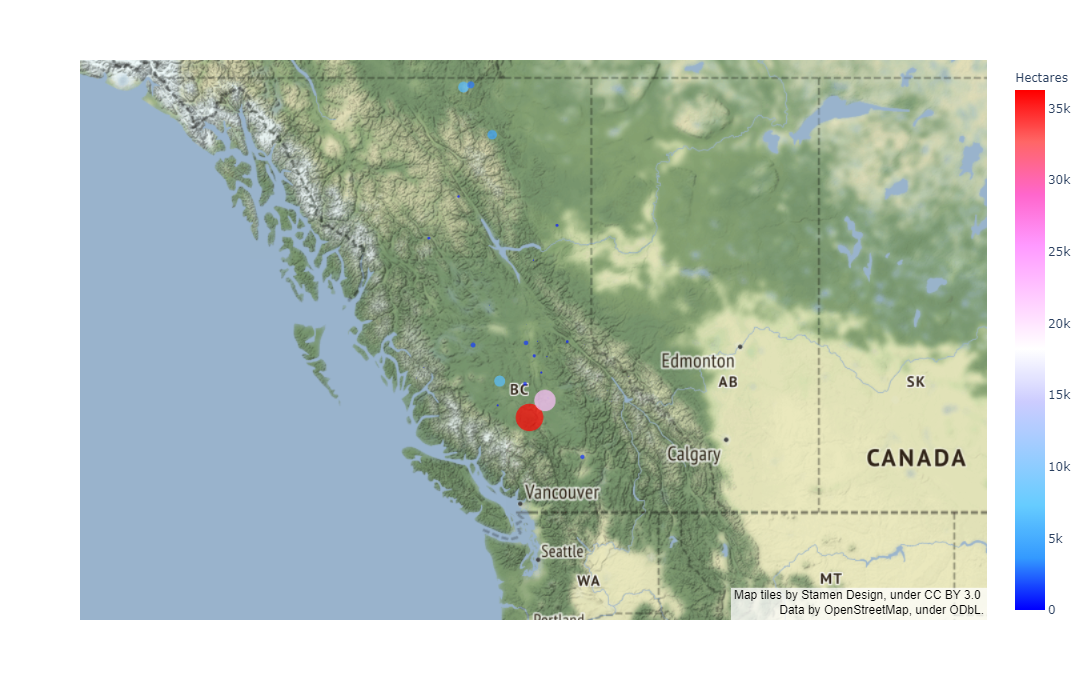

In [45]:
# Plotting the map
map_plot = px.scatter_mapbox(
    fire_df,
    lat = "Latitude.1",
    lon = "Longitude.1",
    color = "Hectares",
    size = "Hectares",
    color_continuous_scale=px.colors.diverging.Picnic,
    hover_name = "Geographic",
    zoom=4,
    mapbox_style = 'stamen-terrain',
    width = 700,
    height = 700
    )
map_plot.show()

